# Grupo 2 - Análise do dataset *"Default of credit card clients"*

**Integrantes:**

- Matheus F. Chaves
- Giovanni Ornellas
- Gabriela Rodrigues
- Juan Vieira

> Santander Coders 2024.1\
> Turma #1175 - Data Science\
> Professor Roberto G. Pontes - Técnicas de Programação I

---

In [1]:
%pip install pandas seaborn matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sobre o Dataset

O dataset contém dados de titulares de cartão de crédito de um banco em Taiwan, coletados em outubro de 2005, com histórico de abril a setembro de 2005.

Há informações sobre o limite de crédito concedido, sexo, escolaridade, estado civil, idade, status de pagamento mensal, valores de faturas e pagamentos, e se o titular é inadimplente ou não.

Obs.: a moeda é em dólar taiwanês (símbolo NT$).

---

Fontes:
- https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients
- https://www.sciencedirect.com/science/article/abs/pii/S0957417407006719?via%3Dihub

In [3]:
credit_df = pd.read_excel('../data/default_of_credit_card_clients.xls')
print(f'Há {credit_df.shape[0]} linhas e {credit_df.shape[1]} colunas.')

Há 30000 linhas e 25 colunas.


# Tratamento dos dados

Como o dataset foi criado com foco em machine learning, as colunas têm valores numéricos. Desejamos uma análise explanatória, portanto decidimos transformar alguns dados para texto, a fim de ter uma melhor compreensão do que significa cada valor e uma melhor visualização na parte gráfica.

In [4]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  object
 1   LIMIT_BAL                   30000 non-null  int64 
 2   SEX                         30000 non-null  int64 
 3   EDUCATION                   30000 non-null  int64 
 4   MARRIAGE                    30000 non-null  int64 
 5   AGE                         30000 non-null  int64 
 6   PAY_1                       30000 non-null  object
 7   PAY_2                       30000 non-null  int64 
 8   PAY_3                       30000 non-null  int64 
 9   PAY_4                       30000 non-null  int64 
 10  PAY_5                       30000 non-null  int64 
 11  PAY_6                       30000 non-null  int64 
 12  BILL_AMT1                   30000 non-null  int64 
 13  BILL_AMT2                   30000 non-null  in

Com `df.info()` é possível perceber algumas coisas:
- Para uma melhor compreensão, podemos mudar os nomes das colunas para português;
- Não temos valores nulos;
- Com exceção do ID, todos os valores deveriam ser int64, mas a coluna *PAY_1* é object - temos que entender o que causou isso.


In [5]:
credit_df.sample(3)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
4662,144a94ae-2e9d,50000,2,3,2,23,0,0,0,0,...,28356,28554,28718,1462,1448,1002,1032,1024,1028,0
25321,57a2db1d-6d57,80000,2,3,2,25,0,0,0,0,...,79080,59873,60520,3000,3058,9013,2200,2200,2500,0
16166,cb12cd55-bfaf,20000,2,2,1,33,0,0,0,0,...,9662,8091,0,1572,1242,1020,2000,0,0,0


Já com uma pequena amostra da base, pode-se verificar que existem colunas com valores não compreensíveis em formato numérico, como:
- SEX
- EDUCATION
- MARRIAGE
- PAY_1, PAY_2, ..., PAY_6

Enquanto as outras colunas representam valores em NT$, essas não nos dão uma percepção imediata do que é cada valor.

In [6]:
print("Valores únicos em 'SEX':", credit_df['SEX'].unique())
print("Valores únicos em 'EDUCATION':", credit_df['EDUCATION'].unique())
print("Valores únicos em 'MARRIAGE':", credit_df['MARRIAGE'].unique())
print("Valores únicos em 'default payment next month':", credit_df['default payment next month'].unique())
print("Valores únicos em 'PAY_1...PAY_6':\n", credit_df.loc[:,'PAY_1':'PAY_6'].apply(lambda x: x.unique()))

Valores únicos em 'SEX': [2 1 0]
Valores únicos em 'EDUCATION': [2 1 3 5 0 4 6]
Valores únicos em 'MARRIAGE': [1 2 3 0]
Valores únicos em 'default payment next month': [1 0]
Valores únicos em 'PAY_1...PAY_6':
 PAY_1    [2, -1, 0, -2, 1, Not available, 3, 4, 8, 7, 5...
PAY_2                  [2, 0, -1, -2, 3, 5, 7, 4, 1, 6, 8]
PAY_3                  [-1, 0, 2, -2, 3, 4, 6, 7, 1, 5, 8]
PAY_4                  [-1, 0, -2, 2, 3, 4, 5, 7, 6, 1, 8]
PAY_5                     [-2, 0, -1, 2, 3, 5, 4, 7, 8, 6]
PAY_6                     [-2, 2, 0, -1, 3, 6, 4, 7, 8, 5]
dtype: object


### Alterando os valores e colunas

Conforme dito anteriormente, vamos tratar os valores para algo mais compreensível em português.

Abaixo, uma tabela mostrando cada valor e seu significado:

| Valor | SEX       | EDUCATION     | MARRIAGE  | PAY_1 ... PAY_6   | default payment next month    |
| ----- | --------- | ---------     | --------- | ----------------  | -------------------------     |
| -2    | -         | -             | -         | Desconhecido      | - |
| -1    | -         | -             | -         | Pagamento pontual | - |
| 0     | Sem info. | Sem info.     | Sem info. | Sem info.         | Não |
| 1     | Masculino | Pós-graduação | Casado    | Atraso de 1 mês   | Sim |
| 2     | Feminino  | Universidade  | Solteiro  | Atraso de 2 meses | -  |
| 3     | -         | Ensino Médio  | Outro     |   ...             | -  |
| 4     | -         | Outro         | -         |   ...             | -  |
| 5     | -         | Desconhecido  | -         |   ...             | -  |
| 6     | -         | Desconhecido  | -         |   ...             | -  |
| ...   | -         | -             | -         |                   | -  |
| 9     | -         | -             | -         | Atraso de 9 meses | -  |

*Obs.: As informações foram retiradas do site de origem do dataset.*

Alguns valores, como 5 e 6 para EDUCATION, -2 para PAY e 0 para todas as colunas, não possuem seus valores definidos na documentação do dataset, portanto assumimos como "Sem info." (sem informação) ou "Desconhecido".


In [7]:
credit_df["SEX"] = credit_df["SEX"].map({0: "Sem informação", 1: "Masculino", 2: "Feminino"})
print(credit_df["SEX"].unique())

['Feminino' 'Masculino' 'Sem informação']


In [8]:
credit_df["EDUCATION"] = credit_df["EDUCATION"].map(
    {
        0: "Sem informação",
        1: "Pós-graduação",
        2: "Universidade",
        3: "Ensino médio",
        4: "Outro",
        5: "Desconhecido",
        6: "Desconhecido",
    }
)
print(credit_df["EDUCATION"].unique())

['Universidade' 'Pós-graduação' 'Ensino médio' 'Desconhecido'
 'Sem informação' 'Outro']


In [9]:
credit_df["MARRIAGE"] = credit_df["MARRIAGE"].map(
    {0: "Sem informação", 1: "Casado", 2: "Solteiro", 3: "Outro"}
)
print(credit_df["MARRIAGE"].unique())

['Casado' 'Solteiro' 'Outro' 'Sem informação']


In [10]:
credit_df.loc[:, "PAY_1":"PAY_6"] = credit_df.loc[:, "PAY_1":"PAY_6"].replace(
    {
        -2: "Desconhecido",
        -1: "Pagamento pontual",
        0: "Sem informação",
        1: "Atraso de 1 mês",
        2: "Atraso de 2 meses",
        3: "Atraso de 3 meses",
        4: "Atraso de 4 meses",
        5: "Atraso de 5 meses",
        6: "Atraso de 6 meses",
        7: "Atraso de 7 meses",
        8: "Atraso de 8 meses",
        9: "Atraso de 9 meses",
    }
)

credit_df.loc[:, "PAY_1":"PAY_6"].sample(5)

/tmp/ipykernel_274988/1698537668.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['Atraso de 2 meses' 'Atraso de 2 meses' 'Sem informação' ...
 'Atraso de 3 meses' 'Pagamento pontual' 'Sem informação']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  credit_df.loc[:, "PAY_1":"PAY_6"] = credit_df.loc[:, "PAY_1":"PAY_6"].replace(
/tmp/ipykernel_274988/1698537668.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['Pagamento pontual' 'Sem informação' 'Sem informação' ...
 'Atraso de 2 meses' 'Sem informação' 'Sem informação']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  credit_df.loc[:, "PAY_1":"PAY_6"] = credit_df.loc[:, "PAY_1":"PAY_6"].replace(
/tmp/ipykernel_274988/1698537668.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and wi

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
23594,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Desconhecido
28097,Desconhecido,Desconhecido,Desconhecido,Desconhecido,Desconhecido,Desconhecido
21441,Sem informação,Sem informação,Sem informação,Atraso de 2 meses,Atraso de 2 meses,Atraso de 2 meses
3856,Not available,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação
22844,Pagamento pontual,Pagamento pontual,Pagamento pontual,Pagamento pontual,Pagamento pontual,Pagamento pontual


In [11]:
credit_df["default payment next month"] = credit_df["default payment next month"].map({0: "Não", 1: "Sim"})
print(credit_df["default payment next month"].unique())

['Sim' 'Não']


In [12]:
new_columns = {
    'ID': 'id',
    'LIMIT_BAL': 'qtd_credito',
    'SEX': 'sexo',
    'EDUCATION': 'escolaridade',
    'MARRIAGE': 'estado_civil',
    'AGE': 'idade',
    'PAY_1': 'status_pagamento_setembro_2005',
    'PAY_2': 'status_pagamento_agosto_2005',
    'PAY_3': 'status_pagamento_julho_2005',
    'PAY_4': 'status_pagamento_junho_2005',
    'PAY_5': 'status_pagamento_maio_2005',
    'PAY_6': 'status_pagamento_abril_2005',
    'BILL_AMT1': 'fatura_setembro_2005',
    'BILL_AMT2': 'fatura_agosto_2005',
    'BILL_AMT3': 'fatura_julho_2005',
    'BILL_AMT4': 'fatura_junho_2005',
    'BILL_AMT5': 'fatura_maio_2005',
    'BILL_AMT6': 'fatura_abril_2005',
    'PAY_AMT1': 'pagamento_setembro_2005',
    'PAY_AMT2': 'pagamento_agosto_2005',
    'PAY_AMT3': 'pagamento_julho_2005',
    'PAY_AMT4': 'pagamento_junho_2005',
    'PAY_AMT5': 'pagamento_maio_2005',
    'PAY_AMT6': 'pagamento_abril_2005',
    'default payment next month': 'inadimplente'
}

credit_df.rename(columns=new_columns, inplace=True)
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   id                              30000 non-null  object
 1   qtd_credito                     30000 non-null  int64 
 2   sexo                            30000 non-null  object
 3   escolaridade                    30000 non-null  object
 4   estado_civil                    30000 non-null  object
 5   idade                           30000 non-null  int64 
 6   status_pagamento_setembro_2005  30000 non-null  object
 7   status_pagamento_agosto_2005    30000 non-null  object
 8   status_pagamento_julho_2005     30000 non-null  object
 9   status_pagamento_junho_2005     30000 non-null  object
 10  status_pagamento_maio_2005      30000 non-null  object
 11  status_pagamento_abril_2005     30000 non-null  object
 12  fatura_setembro_2005            30000 non-null

### Criando novas colunas - faixas

Em nossa análise, comparar o valor numérico pode não ser muito interessante (ou válido) em alguns momentos, portanto decidimos criar faixas para as colunas de *idade* e *qtd_credito*.

Nossa estratégia consistiu em:
- Verificar os valores mínimos e máximos
- Verificar a distribuição dos valores
- Criar faixas que se encaixam nos valores

Maior idade: 79
Menor idade: 0

Distribuição:
idade
29    1592
27    1466
28    1394
30    1388
26    1243
31    1205
25    1176
34    1152
32    1144
33    1137
24    1113
35    1098
36    1095
37    1027
39     941
38     936
23     913
40     861
41     815
42     788
44     695
43     660
45     611
46     566
22     553
47     498
48     462
49     446
50     405
51     336
53     324
0      315
52     299
54     243
55     203
56     175
57     121
58     121
59      82
21      67
60      65
61      56
62      42
64      31
63      31
66      25
65      23
67      16
69      15
70      10
68       5
73       4
75       3
71       3
72       3
79       1
74       1
Name: count, dtype: int64


<Axes: ylabel='Frequency'>

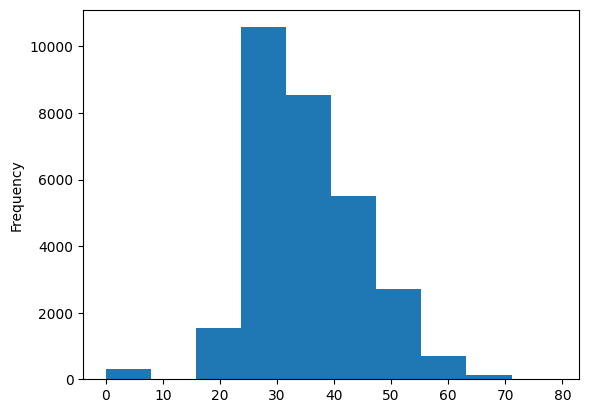

In [13]:
print(f'''Maior idade: {credit_df['idade'].max()}
Menor idade: {credit_df['idade'].min()}

Distribuição:
{credit_df['idade'].value_counts()}''')

credit_df['idade'].plot(kind='hist')

In [14]:
age_bins = [0, 19, 31, 46, 61, 101]
age_labels = ['0-18', '19-30', '31-45', '46-60', '61+']
credit_df['faixa_idade'] = pd.cut(credit_df['idade'], bins=age_bins, labels=age_labels, right=False)
credit_df[['idade', 'faixa_idade']].sample(10)

,idade,faixa_idade
19866,39,31-45
463,28,19-30
17362,38,31-45
26001,31,31-45
18137,33,31-45
13810,47,46-60
1856,34,31-45
29617,48,46-60
955,41,31-45
6935,41,31-45


In [15]:
credit_df['faixa_idade'].value_counts().sort_index().reset_index(name='Quantidade')

,faixa_idade,Quantidade
0,0-18,315
1,19-30,10905
2,31-45,14165
3,46-60,4346
4,61+,269


In [16]:
print(f"Temos {(credit_df['idade'] == 0).sum()} valores iguais a zero.")

Temos 315 valores iguais a zero.


Maior crédito: 1000000
Menor crédito: 0

Distribuição:
qtd_credito
50000      3328
20000      1950
30000      1597
80000      1552
200000     1517
           ... 
800000        2
1000000       1
327680        1
760000        1
690000        1
Name: count, Length: 82, dtype: int64


<Axes: ylabel='Frequency'>

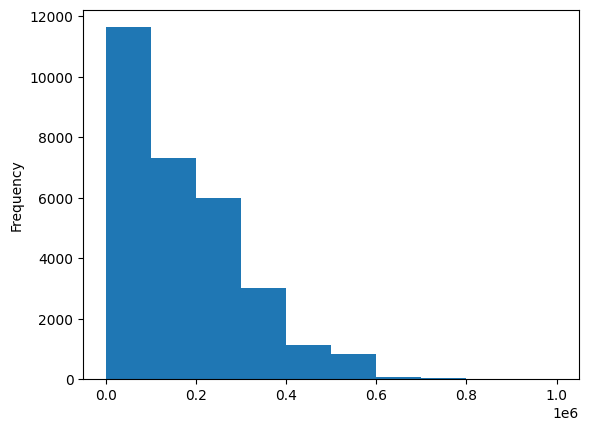

In [17]:
print(f'''Maior crédito: {credit_df['qtd_credito'].max()}
Menor crédito: {credit_df['qtd_credito'].min()}

Distribuição:
{credit_df['qtd_credito'].value_counts()}''')

credit_df['qtd_credito'].plot(kind='hist')

In [18]:
limit_bal_bins = [0, 1, 100000, 250000, 500000, credit_df['qtd_credito'].max()+1]
limit_bal_labels = ['0', '1 - 100.000', '100.001 - 250.000', '250.001 - 500.000', '500.001+']
credit_df['faixa_credito'] = pd.cut(credit_df['qtd_credito'], bins=limit_bal_bins, labels=limit_bal_labels, right=False)
credit_df[['qtd_credito', 'faixa_credito']].sample(10)

,qtd_credito,faixa_credito
27696,40000,1 - 100.000
7423,50000,1 - 100.000
8630,40000,1 - 100.000
8781,360000,250.001 - 500.000
3786,400000,250.001 - 500.000
3243,30000,1 - 100.000
27406,50000,1 - 100.000
10269,50000,1 - 100.000
19624,80000,1 - 100.000
10405,310000,250.001 - 500.000


In [19]:
credit_df['faixa_credito'].value_counts().sort_index().reset_index(name='Quantidade')

,faixa_credito,Quantidade
0,0,315
1,1 - 100.000,11324
2,100.001 - 250.000,11367
3,250.001 - 500.000,6078
4,500.001+,916


Note que, enquanto para a faixa de crédito nós decidimos criar uma faixa exclusiva para o valor zero, nós não fizemos o mesmo com a idade.

Estamos considerando nas as outras colunas do dataset o valor 0 como a representação da **ausência de informação**, portanto, por precaução, decidimos não fazer o mesmo para a faixa de crédito, pois não temos certeza se o crédito é zero ou se é algo sem informação.\
Agora, para a faixa etária, deixamos uma faixa de 0-18 anos, porém vimos que não se trata da idade, já que todos os 315 valores nesta faixa são iguais a zero, então iremos tratar esse valor depois.

In [20]:
credit_df.sample(5)

,id,qtd_credito,sexo,escolaridade,estado_civil,idade,status_pagamento_setembro_2005,status_pagamento_agosto_2005,status_pagamento_julho_2005,status_pagamento_junho_2005,...,fatura_abril_2005,pagamento_setembro_2005,pagamento_agosto_2005,pagamento_julho_2005,pagamento_junho_2005,pagamento_maio_2005,pagamento_abril_2005,inadimplente,faixa_idade,faixa_credito
18883,76343629-9bfa,120000,Feminino,Pós-graduação,Solteiro,32,Atraso de 1 mês,Desconhecido,Desconhecido,Desconhecido,...,0,0,0,0,0,0,0,Não,31-45,100.001 - 250.000
10956,d9dafe9c-b497,80000,Feminino,Universidade,Casado,35,Sem informação,Sem informação,Sem informação,Sem informação,...,316,1250,1200,1000,0,316,31002,Não,31-45,1 - 100.000
15664,7c6427b6-0450,150000,Feminino,Universidade,Casado,45,Sem informação,Sem informação,Sem informação,Sem informação,...,66206,12000,7007,3000,3000,2500,5000,Não,31-45,100.001 - 250.000
2610,0a4bf7e4-f499,340000,Feminino,Universidade,Solteiro,39,Sem informação,Sem informação,Sem informação,Sem informação,...,62516,2500,2500,2500,3300,2200,3000,Não,31-45,250.001 - 500.000
9737,65997c36-acb9,50000,Feminino,Ensino médio,Casado,43,Not available,Sem informação,Sem informação,Sem informação,...,6713,1862,1077,1000,1000,1000,1000,Não,31-45,1 - 100.000


### Identificando e tratando valores duplicados

In [21]:
credit_df.duplicated('id').value_counts()

False    29687
True       313
Name: count, dtype: int64

In [22]:
# Com 'keep=False' conseguimos ver a duplicidade na tabela, por isso temos o dobro de linhas
duplicated_ids = credit_df.duplicated('id', keep=False)
credit_df[duplicated_ids].sort_values(by='id')

,id,qtd_credito,sexo,escolaridade,estado_civil,idade,status_pagamento_setembro_2005,status_pagamento_agosto_2005,status_pagamento_julho_2005,status_pagamento_junho_2005,...,fatura_abril_2005,pagamento_setembro_2005,pagamento_agosto_2005,pagamento_julho_2005,pagamento_junho_2005,pagamento_maio_2005,pagamento_abril_2005,inadimplente,faixa_idade,faixa_credito
15863,01355f46-3f0b,0,Sem informação,Sem informação,Sem informação,0,Sem informação,Sem informação,Sem informação,Sem informação,...,0,0,0,0,0,0,0,Não,0-18,0
15763,01355f46-3f0b,100000,Feminino,Universidade,Solteiro,23,Not available,Atraso de 2 meses,Atraso de 2 meses,Atraso de 2 meses,...,95885,5000,4300,3600,3700,0,7300,Não,19-30,100.001 - 250.000
21972,0170086d-7472,0,Sem informação,Sem informação,Sem informação,0,Sem informação,Sem informação,Sem informação,Sem informação,...,0,0,0,0,0,0,0,Não,0-18,0
21872,0170086d-7472,100000,Feminino,Pós-graduação,Casado,25,Sem informação,Sem informação,Pagamento pontual,Sem informação,...,35796,28,103350,1722,1100,1300,2000,Não,19-30,100.001 - 250.000
3284,02e41927-a6df,60000,Feminino,Universidade,Solteiro,21,Sem informação,Sem informação,Sem informação,Sem informação,...,26183,1859,1410,910,939,1000,1000,Não,19-30,1 - 100.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20226,ff8b7170-ce3a,0,Sem informação,Sem informação,Sem informação,0,Sem informação,Sem informação,Sem informação,Sem informação,...,0,0,0,0,0,0,0,Não,0-18,0
2005,ffa0f012-3bd7,20000,Masculino,Universidade,Solteiro,34,Not available,Desconhecido,Desconhecido,Desconhecido,...,780,1530,750,1140,3000,780,0,Não,31-45,1 - 100.000
2105,ffa0f012-3bd7,0,Sem informação,Sem informação,Sem informação,0,Sem informação,Sem informação,Sem informação,Sem informação,...,0,0,0,0,0,0,0,Não,0-18,0
8746,ffb9a143-c375,80000,Masculino,Pós-graduação,Solteiro,27,Sem informação,Sem informação,Sem informação,Sem informação,...,52833,5000,1801,5000,2035,2100,6200,Não,19-30,1 - 100.000


Temos 313 IDs que não são únicos na nossa tabela, o que não deveria acontecer.

Analisando a tabela acima, percebe-se que um ID possui vários valores zerados ou sem informação, enquanto o outro têm informações preenchidas.\
Vamos tentar remover essas linhas que possuem dados zerados e depois verificar se ainda existem IDs duplicados.

In [23]:
# essa query é para tentar encontrar todos os valores duplicados e sem info. da tabela acima
# utilizamos idade e qtd_credito, pois parece ser o padrão vendo os dados acima
query = "idade == 0 & qtd_credito == 0"
credit_df[duplicated_ids].query(query).sort_values(by='id')

,id,qtd_credito,sexo,escolaridade,estado_civil,idade,status_pagamento_setembro_2005,status_pagamento_agosto_2005,status_pagamento_julho_2005,status_pagamento_junho_2005,...,fatura_abril_2005,pagamento_setembro_2005,pagamento_agosto_2005,pagamento_julho_2005,pagamento_junho_2005,pagamento_maio_2005,pagamento_abril_2005,inadimplente,faixa_idade,faixa_credito
15863,01355f46-3f0b,0,Sem informação,Sem informação,Sem informação,0,Sem informação,Sem informação,Sem informação,Sem informação,...,0,0,0,0,0,0,0,Não,0-18,0
21972,0170086d-7472,0,Sem informação,Sem informação,Sem informação,0,Sem informação,Sem informação,Sem informação,Sem informação,...,0,0,0,0,0,0,0,Não,0-18,0
3384,02e41927-a6df,0,Sem informação,Sem informação,Sem informação,0,Sem informação,Sem informação,Sem informação,Sem informação,...,0,0,0,0,0,0,0,Não,0-18,0
26514,04299d54-61d4,0,Sem informação,Sem informação,Sem informação,0,Sem informação,Sem informação,Sem informação,Sem informação,...,0,0,0,0,0,0,0,Não,0-18,0
4676,04c32736-903c,0,Sem informação,Sem informação,Sem informação,0,Sem informação,Sem informação,Sem informação,Sem informação,...,0,0,0,0,0,0,0,Não,0-18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12191,ff619017-560f,0,Sem informação,Sem informação,Sem informação,0,Sem informação,Sem informação,Sem informação,Sem informação,...,0,0,0,0,0,0,0,Não,0-18,0
6701,ff6e1bd3-4e91,0,Sem informação,Sem informação,Sem informação,0,Sem informação,Sem informação,Sem informação,Sem informação,...,0,0,0,0,0,0,0,Não,0-18,0
20226,ff8b7170-ce3a,0,Sem informação,Sem informação,Sem informação,0,Sem informação,Sem informação,Sem informação,Sem informação,...,0,0,0,0,0,0,0,Não,0-18,0
2105,ffa0f012-3bd7,0,Sem informação,Sem informação,Sem informação,0,Sem informação,Sem informação,Sem informação,Sem informação,...,0,0,0,0,0,0,0,Não,0-18,0


São exatamente 313 linhas (mesma quantidade de linhas duplicadas) que possuem resultados zerados/nulos. Portanto, podemos deletar essas linhas, removendo a duplicidade dos IDs ao mesmo tempo.

Depois, checamos para ver se realmente foram as 313 linhas com valores sem informação que foram apagadas.

In [24]:
credit_df.drop_duplicates(subset='id', inplace=True)
credit_df.duplicated('id').value_counts()

False    29687
Name: count, dtype: int64

### Tratando valores incomuns

Por mais que agora o dataset não contenha valores nulos ou duplicados, algumas linhas serão irrelevantes para a análise, pois elas são cheias de valores 'Sem informação'. Sendo assim, decidimos remover colunas que contenham todos os seus casos zerados e/ou sem informação.

In [25]:
credit_df.isna().sum()

id                                0
qtd_credito                       0
sexo                              0
escolaridade                      0
estado_civil                      0
idade                             0
status_pagamento_setembro_2005    0
status_pagamento_agosto_2005      0
status_pagamento_julho_2005       0
status_pagamento_junho_2005       0
status_pagamento_maio_2005        0
status_pagamento_abril_2005       0
fatura_setembro_2005              0
fatura_agosto_2005                0
fatura_julho_2005                 0
fatura_junho_2005                 0
fatura_maio_2005                  0
fatura_abril_2005                 0
pagamento_setembro_2005           0
pagamento_agosto_2005             0
pagamento_julho_2005              0
pagamento_junho_2005              0
pagamento_maio_2005               0
pagamento_abril_2005              0
inadimplente                      0
faixa_idade                       0
faixa_credito                     0
dtype: int64

In [26]:
query_without_info = f"{query} & sexo == 'Sem informação' & escolaridade == 'Sem informação' & estado_civil == 'Sem informação'"

In [27]:
indexes_without_info = credit_df.query(query_without_info).index
credit_df.loc[indexes_without_info, :]

,id,qtd_credito,sexo,escolaridade,estado_civil,idade,status_pagamento_setembro_2005,status_pagamento_agosto_2005,status_pagamento_julho_2005,status_pagamento_junho_2005,...,fatura_abril_2005,pagamento_setembro_2005,pagamento_agosto_2005,pagamento_julho_2005,pagamento_junho_2005,pagamento_maio_2005,pagamento_abril_2005,inadimplente,faixa_idade,faixa_credito
17317,17fb5354-37ec,0,Sem informação,Sem informação,Sem informação,0,Sem informação,Sem informação,Sem informação,Sem informação,...,0,0,0,0,0,0,0,Não,0-18,0
19863,5d7d605d-f03c,0,Sem informação,Sem informação,Sem informação,0,Sem informação,Sem informação,Sem informação,Sem informação,...,0,0,0,0,0,0,0,Não,0-18,0


In [28]:
credit_df.drop(indexes_without_info, inplace=True)
credit_df.shape

(29685, 27)

Agora, todas as colunas que não faziam sentido ter valores "Sem informação" foram removidas, ficando apenas as de escolaridade, estado civil e status do pagamento.

In [29]:
credit_df.apply(lambda col: (col == 'Sem informação').sum())

id                                    0
qtd_credito                           0
sexo                                  0
escolaridade                         14
estado_civil                         54
idade                                 0
status_pagamento_setembro_2005    13087
status_pagamento_agosto_2005      15563
status_pagamento_julho_2005       15599
status_pagamento_junho_2005       16285
status_pagamento_maio_2005        16754
status_pagamento_abril_2005       16093
fatura_setembro_2005                  0
fatura_agosto_2005                    0
fatura_julho_2005                     0
fatura_junho_2005                     0
fatura_maio_2005                      0
fatura_abril_2005                     0
pagamento_setembro_2005               0
pagamento_agosto_2005                 0
pagamento_julho_2005                  0
pagamento_junho_2005                  0
pagamento_maio_2005                   0
pagamento_abril_2005                  0
inadimplente                          0


Por mais que ainda existam valores sem informação em nosso dataframe, vimos nos tratamentos acima (através da query), que não é toda a linha que está sem informação. \
Dessa forma, deduzimos que em uma mesma linha é possível que alguns valores tenham informação, enquanto outros não - sendo algo normal e sem necessidade de um tratamento, pelo menos para o nosso caso.

# Análise do dataset

Após os tratamentos, podemos retirar algumas conclusões sobre os valores de dentro do dataset

In [30]:
colunas_para_analise = ['sexo', 'estado_civil', 'escolaridade','faixa_idade']

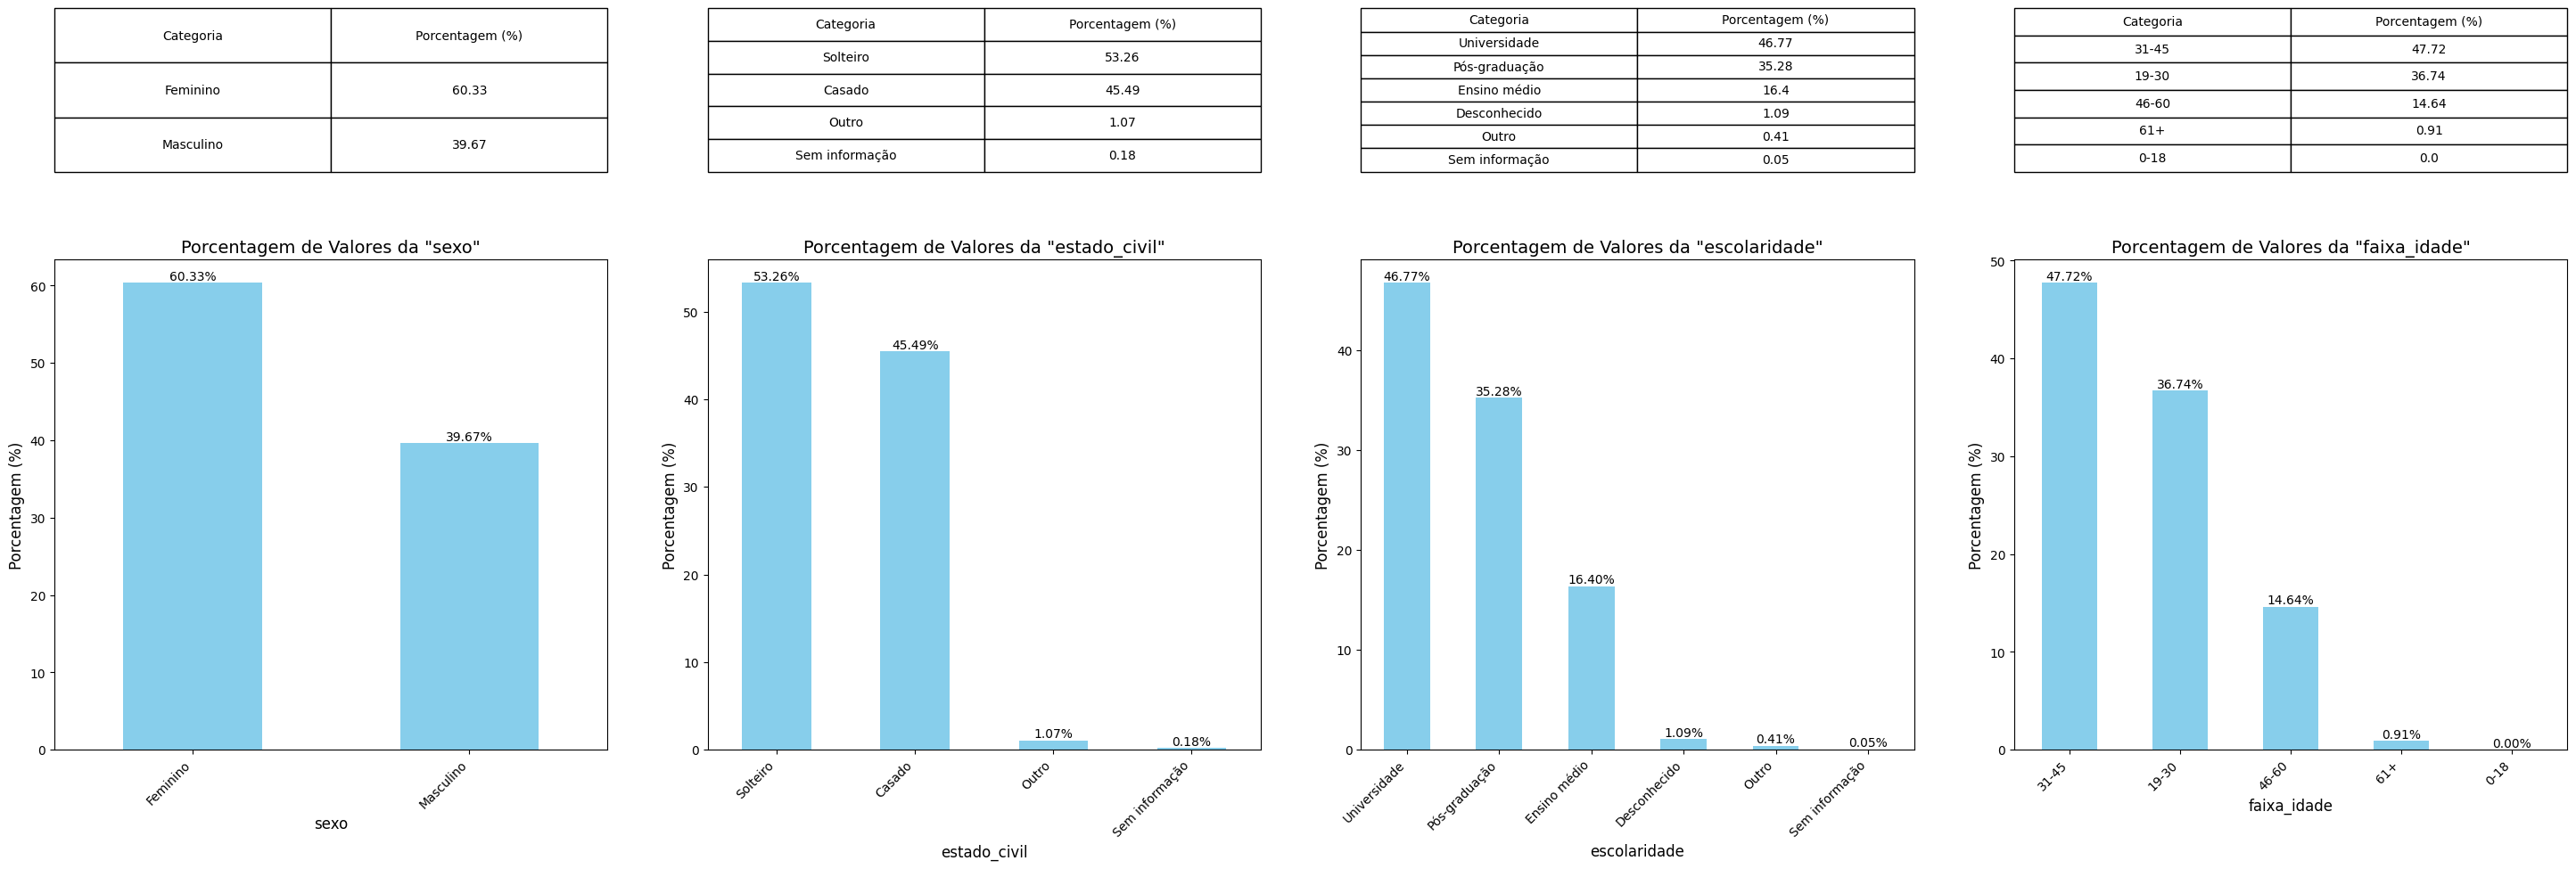

In [31]:
# Definir o número de colunas e linhas para subplots
num_colunas = len(colunas_para_analise)
num_linhas = 2  # 1 linha para a tabela e 1 para o gráfico

# Criar a figura e os eixos
fig, axes = plt.subplots(nrows=num_linhas, 
                         ncols=num_colunas, 
                         figsize=(30, 10), 
                         gridspec_kw={'height_ratios': [1, 3]}) # proporção da altura dos subplots

# Ajustar o layout
plt.tight_layout(pad=5.0)

# Loop para gerar gráficos e tabelas para cada coluna
for i, coluna in enumerate(colunas_para_analise):
    # Adicionar os eixos para tabela e gráfico
    tabela_ax = axes[0, i]
    grafico_ax = axes[1, i]

    # Calcular a porcentagem
    porcentagem_por_coluna = (credit_df[coluna].value_counts(normalize=True) * 100).round(2).sort_values(ascending=False)

    # Adicionar a tabela
    tabela = tabela_ax.table(cellText=porcentagem_por_coluna.reset_index().values,
                             colLabels=['Categoria', 'Porcentagem (%)'],
                             cellLoc='center', loc='center', bbox=[0, 0, 1, 1])
    tabela_ax.axis('off')  # Desativar o eixo para a tabela

    # Adicionar o gráfico
    barras = porcentagem_por_coluna.plot(kind='bar', 
                                         ax=grafico_ax, 
                                         color='skyblue')

    # Adicionar título e rótulos
    grafico_ax.set_title(f'Porcentagem de Valores da "{coluna}"', fontsize=14)
    grafico_ax.set_xlabel(coluna, fontsize=12)
    grafico_ax.set_ylabel('Porcentagem (%)', fontsize=12)
    grafico_ax.set_xticks(range(len(porcentagem_por_coluna.index)))
    grafico_ax.set_xticklabels(porcentagem_por_coluna.index, rotation=45, ha='right')

    # Adicionar rótulos de dados com duas casas decimais
    for bar in barras.patches:
        height = bar.get_height()
        grafico_ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}%', 
                        ha='center', va='bottom', fontsize=10)

# Exibir o gráfico
plt.show()


Nessa análise geral da base, sem muito foco nas colunas mais complexas que representam valores mais abertos, conseguimos ter um 'norte' inicial para ajudar a chegar nas conclusões:

- A maior parte da base é composta por mulheres, logo, por não ser algo balanceado, precisamos ter uma atenção ao afirmar certas coisas sobre esse perfil
- Os valores de 'Outro' ou 'Sem informação' representam uma pequena parte da base, ou seja, mesmo sem valores claros, isso não irá afetar negativamente a análise
- O estado civil, escolaridade e faixa etária são colunas interessantes para criar uma relação entre elas, já que possuem diversos valores

# Respondendo perguntas

Decidimos seguir na análise respondendo duas perguntas:

1. **Linha de Crédito**: Como as variáveis categóricas estão relacionadas com a Linha de Crédito recebida?
2. **Inadimplência**: Quais as principais características que uma pessoa inadimplente possui?

## Análise - Linha de Crédito

### Como a quantidade de crédito é dividida entre sexo, faixa etária, escolaridade e estado civil?

/tmp/ipykernel_274988/3028126991.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distrib_credito = credit_df.groupby(coluna)['qtd_credito'].mean().round(2).sort_values(ascending=False)


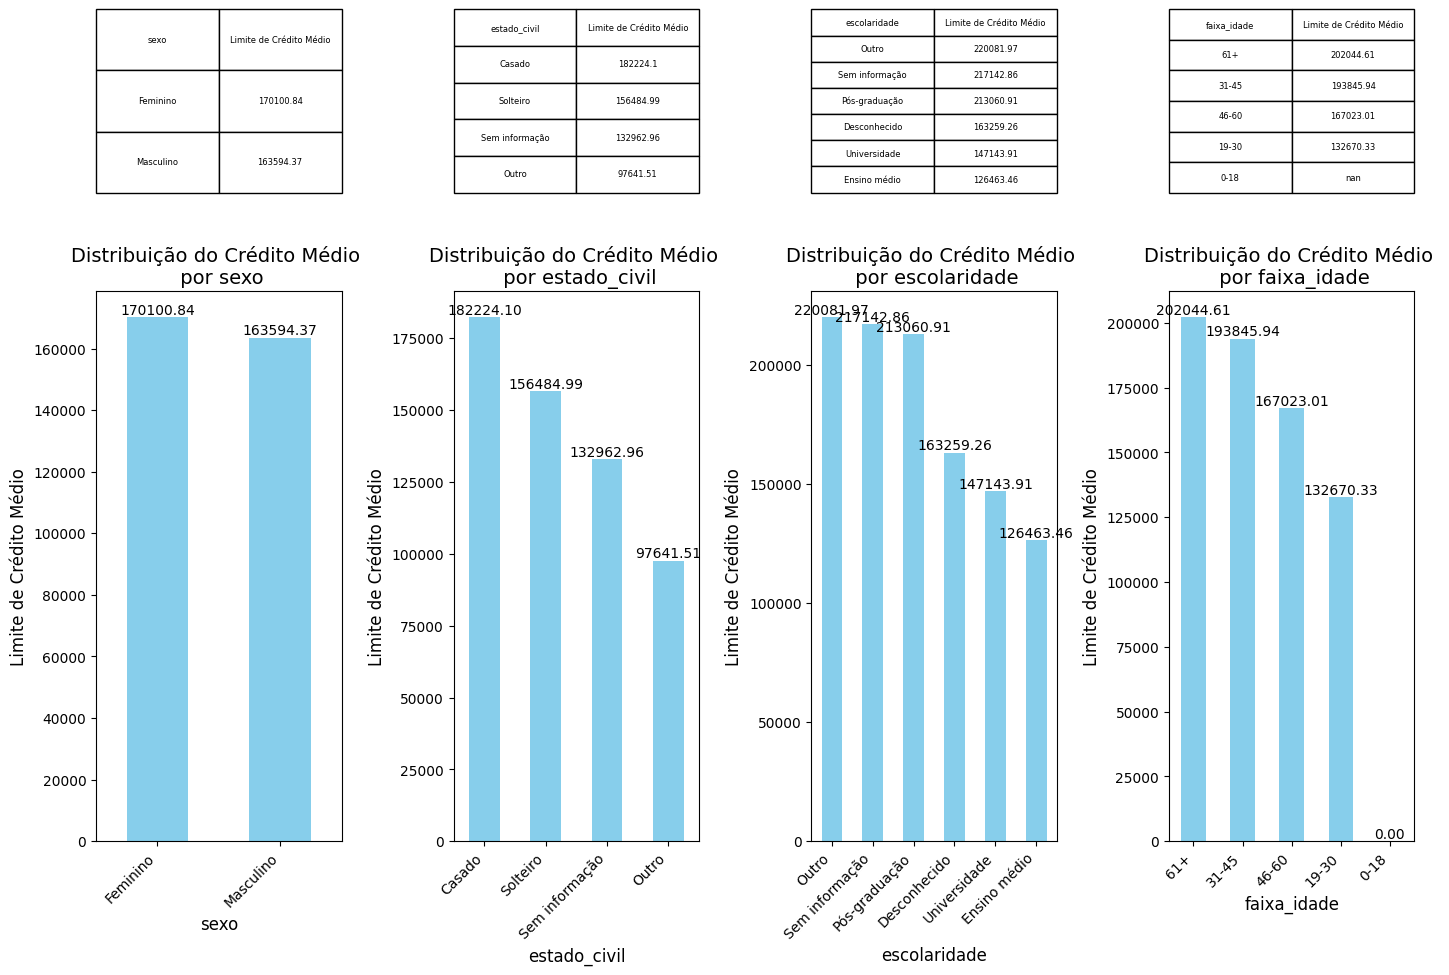

In [32]:
# Definir o número de colunas e linhas para subplots
num_colunas = len(colunas_para_analise)
num_linhas = 2  # 1 linha para a tabela e 1 para o gráfico

# Criar a figura e os eixos
fig, axes = plt.subplots(nrows=num_linhas, ncols=num_colunas, figsize=(15, 10), gridspec_kw={'height_ratios': [1, 3]})

# Ajustar o layout
plt.tight_layout(pad=5.0)


# Loop para gerar gráficos e tabelas para cada coluna
for i, coluna in enumerate(colunas_para_analise):
    # Adicionar os eixos para tabela e gráfico
    tabela_ax = axes[0, i] if num_colunas > 1 else axes[0]
    grafico_ax = axes[1, i] if num_colunas > 1 else axes[1]

    # Calcular a distribuição do crédito
    distrib_credito = credit_df.groupby(coluna)['qtd_credito'].mean().round(2).sort_values(ascending=False)

    # Adicionar a tabela
    tabela = tabela_ax.table(cellText=distrib_credito.reset_index().values,
                             colLabels=[coluna, 'Limite de Crédito Médio'],
                             cellLoc='center', loc='center', bbox=[0, 0, 1, 1])
    tabela_ax.axis('off')  # Desativar o eixo para a tabela

    # Adicionar o gráfico
    barras = distrib_credito.plot(kind='bar', ax=grafico_ax, color='skyblue')

    # Adicionar título e rótulos
    grafico_ax.set_title(f'Distribuição do Crédito Médio \n por {coluna}', fontsize=14)
    grafico_ax.set_xlabel(coluna, fontsize=12)
    grafico_ax.set_ylabel('Limite de Crédito Médio', fontsize=12)
    grafico_ax.set_xticks(range(len(distrib_credito.index)))
    grafico_ax.set_xticklabels(distrib_credito.index, rotation=45, ha='right')

    # Adicionar rótulos de dados com duas casas decimais
    for bar in barras.patches:
        height = bar.get_height()
        grafico_ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', 
                        ha='center', va='bottom', fontsize=10)

# Exibir o gráfico
plt.show()

In [33]:
# Criar um dicionário para armazenar os DataFrames de contagem
contagem_por_faixa_credito_dict = {}

# Loop para analisar cada coluna
for coluna in colunas_para_analise:
    # Agrupar por 'Faixa de Crédito' e contar a quantidade das variáveis da coluna atual
    contagem = (credit_df.groupby('faixa_credito', observed=False)[coluna]
                .value_counts(normalize=True)*100).unstack(fill_value=0).round(2)
    
    # Renomear colunas para mais clareza, se desejar
    contagem.columns.name = None
    contagem = contagem.reset_index()
    
    # Adicionar o DataFrame ao dicionário
    contagem_por_faixa_credito_dict[coluna] = contagem

# Exibir os DataFrames resultantes
for coluna, contagem in contagem_por_faixa_credito_dict.items():
    print(f"Porcentagem para a coluna '{coluna}':")
    display(contagem)

Porcentagem para a coluna 'sexo':


,faixa_credito,Feminino,Masculino
0,0,0.00,0.00
1,1 - 100.000,56.46,43.54
2,100.001 - 250.000,64.45,35.55
3,250.001 - 500.000,60.73,39.27
4,500.001+,54.59,45.41


Porcentagem para a coluna 'estado_civil':


,faixa_credito,Casado,Outro,Sem informação,Solteiro
0,0,0.00,0.00,0.00,0.00
1,1 - 100.000,39.99,1.88,0.20,57.92
2,100.001 - 250.000,46.52,0.69,0.23,52.56
3,250.001 - 500.000,52.22,0.41,0.08,47.29
4,500.001+,55.90,0.22,0.00,43.89


Porcentagem para a coluna 'escolaridade':


,faixa_credito,Desconhecido,Ensino médio,Outro,Pós-graduação,Sem informação,Universidade
0,0,0.00,0.00,0.00,0.00,0.00,0.00
1,1 - 100.000,0.98,22.99,0.11,20.93,0.01,54.99
2,100.001 - 250.000,1.32,14.02,0.62,39.34,0.07,44.62
3,250.001 - 500.000,0.94,9.69,0.56,50.64,0.08,38.09
4,500.001+,0.66,8.84,0.55,60.48,0.00,29.48


Porcentagem para a coluna 'faixa_idade':


,faixa_credito,0-18,19-30,31-45,46-60,61+
0,0,0.0,0.00,0.00,0.00,0.00
1,1 - 100.000,0.0,47.03,36.01,16.18,0.78
2,100.001 - 250.000,0.0,35.15,51.48,12.57,0.79
3,250.001 - 500.000,0.0,24.00,60.09,14.66,1.25
4,500.001+,0.0,13.54,63.65,21.18,1.64


### Como a linha de crédito é dividida quando relacionada a mais de uma variável categórica?

In [34]:
contagem_sex_idade_faixa_credito = (credit_df.groupby(['sexo', 'faixa_idade'])['faixa_credito']
                                    .value_counts(normalize=True) * 100).round(2).reset_index(name='Porcentagem')

contagem_sex_idade_faixa_credito.pivot_table(index=['sexo', 'faixa_credito'], 
                                                               columns='faixa_idade',
                                                               values='Porcentagem',
                                                               fill_value=0)

/tmp/ipykernel_274988/1293840515.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contagem_sex_idade_faixa_credito = (credit_df.groupby(['sexo', 'faixa_idade'])['faixa_credito']
/tmp/ipykernel_274988/1293840515.py:4: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  contagem_sex_idade_faixa_credito.pivot_table(index=['sexo', 'faixa_credito'],


faixa_idade                  0-18  19-30  31-45  46-60    61+
sexo      faixa_credito                                      
Feminino  0                   0.0   0.00   0.00   0.00   0.00
          1 - 100.000         0.0  45.47  25.68  41.52  38.52
          100.001 - 250.000   0.0  39.07  44.14  35.29  35.25
          250.001 - 500.000   0.0  14.35  26.22  19.51  22.13
          500.001+            0.0   1.11   3.95   3.68   4.10
Masculino 0                   0.0   0.00   0.00   0.00   0.00
          1 - 100.000         0.0  55.12  33.22  42.91  27.89
          100.001 - 250.000   0.0  32.14  37.27  30.01  31.97
          250.001 - 500.000   0.0  11.57  25.15  21.68  33.33
          500.001+            0.0   1.18   4.35   5.40   6.80

In [35]:
contagem_estado_civil_idade_faixa_credito = (credit_df.groupby(['estado_civil', 'faixa_idade'])['faixa_credito']
                                    .value_counts(normalize=True) * 100).round(2).reset_index(name='Porcentagem')

contagem_estado_civil_idade_faixa_credito.pivot_table(index=['estado_civil', 'faixa_credito'], 
                                                               columns='faixa_idade',
                                                               values='Porcentagem',
                                                               fill_value=0)

/tmp/ipykernel_274988/3700292595.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contagem_estado_civil_idade_faixa_credito = (credit_df.groupby(['estado_civil', 'faixa_idade'])['faixa_credito']
/tmp/ipykernel_274988/3700292595.py:4: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  contagem_estado_civil_idade_faixa_credito.pivot_table(index=['estado_civil', 'faixa_credito'],


faixa_idade                       0-18  19-30  31-45  46-60    61+
estado_civil   faixa_credito                                      
Casado         0                   0.0   0.00   0.00   0.00   0.00
               1 - 100.000         0.0  48.39  28.58  37.96  29.28
               100.001 - 250.000   0.0  37.02  41.85  33.89  33.33
               250.001 - 500.000   0.0  13.84  25.62  23.13  31.53
               500.001+            0.0   0.75   3.95   5.02   5.86
Outro          0                   0.0   0.00   0.00   0.00   0.00
               1 - 100.000         0.0  62.79  62.14  73.08  80.00
               100.001 - 250.000   0.0  34.88  25.00  20.77  20.00
               250.001 - 500.000   0.0   2.33  12.14   5.38   0.00
               500.001+            0.0   0.00   0.71   0.77   0.00
Sem informação 0                   0.0   0.00   0.00   0.00   0.00
               1 - 100.000         0.0  58.33  41.94  27.27   0.00
               100.001 - 250.000   0.0  33.33  51.61  54.55   0.00
               250.001 - 500.000   0.0   8.33   6.45  18.18   0.00
               500.001+            0.0   0.00   0.00   0.00   0.00
Solteiro       0                   0.0   0.00   0.00   0.00   0.00
               1 - 100.000         0.0  48.85  28.21  51.53  45.24
               100.001 - 250.000   0.0  36.58  40.89  31.03  35.71
               250.001 - 500.000   0.0  13.34  26.44  14.19  14.29
               500.001+            0.0   1.22   4.46   3.25   4.76

In [36]:
contagem_estado_civil_escolaridade_faixa_credito = (credit_df.groupby(['estado_civil', 'escolaridade'])['faixa_credito']
                                    .value_counts(normalize=True) * 100).round(2).reset_index(name='Porcentagem')

contagem_estado_civil_escolaridade_faixa_credito.pivot_table(index=['estado_civil', 'faixa_credito'], 
                                                               columns='escolaridade',
                                                               values='Porcentagem',
                                                               fill_value=0)


/tmp/ipykernel_274988/2921531742.py:4: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  contagem_estado_civil_escolaridade_faixa_credito.pivot_table(index=['estado_civil', 'faixa_credito'],


escolaridade                      Desconhecido  Ensino médio   Outro  \
estado_civil   faixa_credito                                           
Casado         0                          0.00          0.00    0.00   
               1 - 100.000               25.43         50.34    1.92   
               100.001 - 250.000         49.13         34.59   59.62   
               250.001 - 500.000         23.12         13.37   32.69   
               500.001+                   2.31          1.70    5.77   
Outro          0                          0.00          0.00    0.00   
               1 - 100.000               25.00         79.61    0.00   
               100.001 - 250.000         50.00         14.56  100.00   
               250.001 - 500.000         25.00          4.85    0.00   
               500.001+                   0.00          0.97    0.00   
Sem informação 0                          0.00          0.00    0.00   
               1 - 100.000                0.00         47.73    0.00   
               100.001 - 250.000          0.00         47.73    0.00   
               250.001 - 500.000          0.00          4.55    0.00   
               500.001+                   0.00          0.00    0.00   
Solteiro       0                          0.00          0.00    0.00   
               1 - 100.000               44.90         56.89   16.18   
               100.001 - 250.000         42.86         30.64   55.88   
               250.001 - 500.000         10.88         10.78   25.00   
               500.001+                   1.36          1.69    2.94   

escolaridade                      Pós-graduação  Sem informação  Universidade  
estado_civil   faixa_credito                                                   
Casado         0                           0.00             0.0          0.00  
               1 - 100.000                11.34            25.0         39.07  
               100.001 - 250.000          43.01            50.0         38.55  
               250.001 - 500.000          37.99            25.0         19.79  
               500.001+                    7.65             0.0          2.59  
Outro          0                           0.00             0.0          0.00  
               1 - 100.000                34.00             0.0         71.07  
               100.001 - 250.000          40.00             0.0         24.53  
               250.001 - 500.000          24.00             0.0          4.40  
               500.001+                    2.00             0.0          0.00  
Sem informação 0                           0.00             0.0          0.00  
               1 - 100.000                25.00             0.0         16.67  
               100.001 - 250.000          50.00             0.0         50.00  
               250.001 - 500.000          25.00             0.0         33.33  
               500.001+                    0.00             0.0          0.00  
Solteiro       0                           0.00             0.0          0.00  
               1 - 100.000                28.72             0.0         49.89  
               100.001 - 250.000          42.54            60.0         34.83  
               250.001 - 500.000          24.72            40.0         13.91  
               500.001+                    4.02             0.0          1.37

Com essas análises acima, conseguimos pegar algumas informações interessantes:

- 
-
-

## Analisando a inadimplência

### Como a inadimplência é dividida entre sexo, faixa etária, escolaridade e estado civil?

inadimplente
Não    77.89456
Sim    22.10544
Name: proportion, dtype: float64


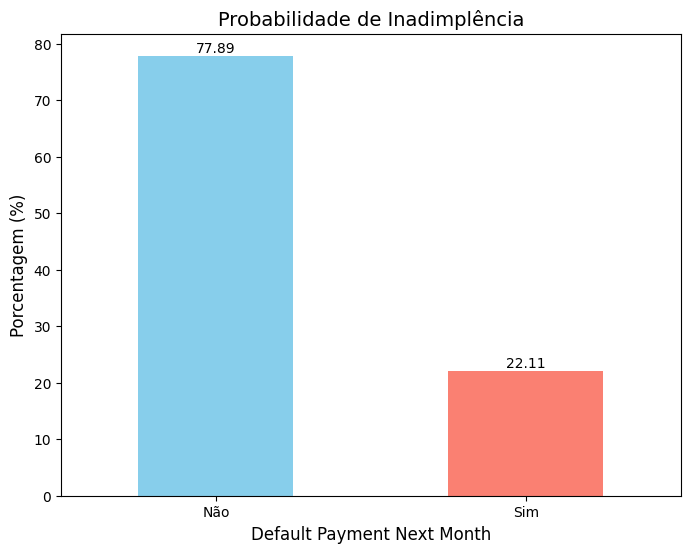

In [37]:
contagem_por_default = (credit_df['inadimplente'].value_counts(normalize=True))*100

print(contagem_por_default)

# Gráfico
plt.figure(figsize=(8, 6))
bars = contagem_por_default.plot(kind='bar', color=['skyblue', 'salmon'])

# Adicionar título e rótulos
plt.title('Probabilidade de Inadimplência', fontsize=14)
plt.xlabel('Default Payment Next Month', fontsize=12)
plt.ylabel('Porcentagem (%)', fontsize=12)
plt.xticks(ticks=range(len(contagem_por_default.index)), labels=contagem_por_default.index, rotation=0)

# Adicionar rótulos de dados
for bar in bars.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', 
             ha='center', va='bottom', fontsize=10)
    
# Exibir o gráfico
plt.show()

/tmp/ipykernel_274988/3964907499.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  porcentagem_por_coluna = (credit_df.groupby(coluna)['inadimplente']


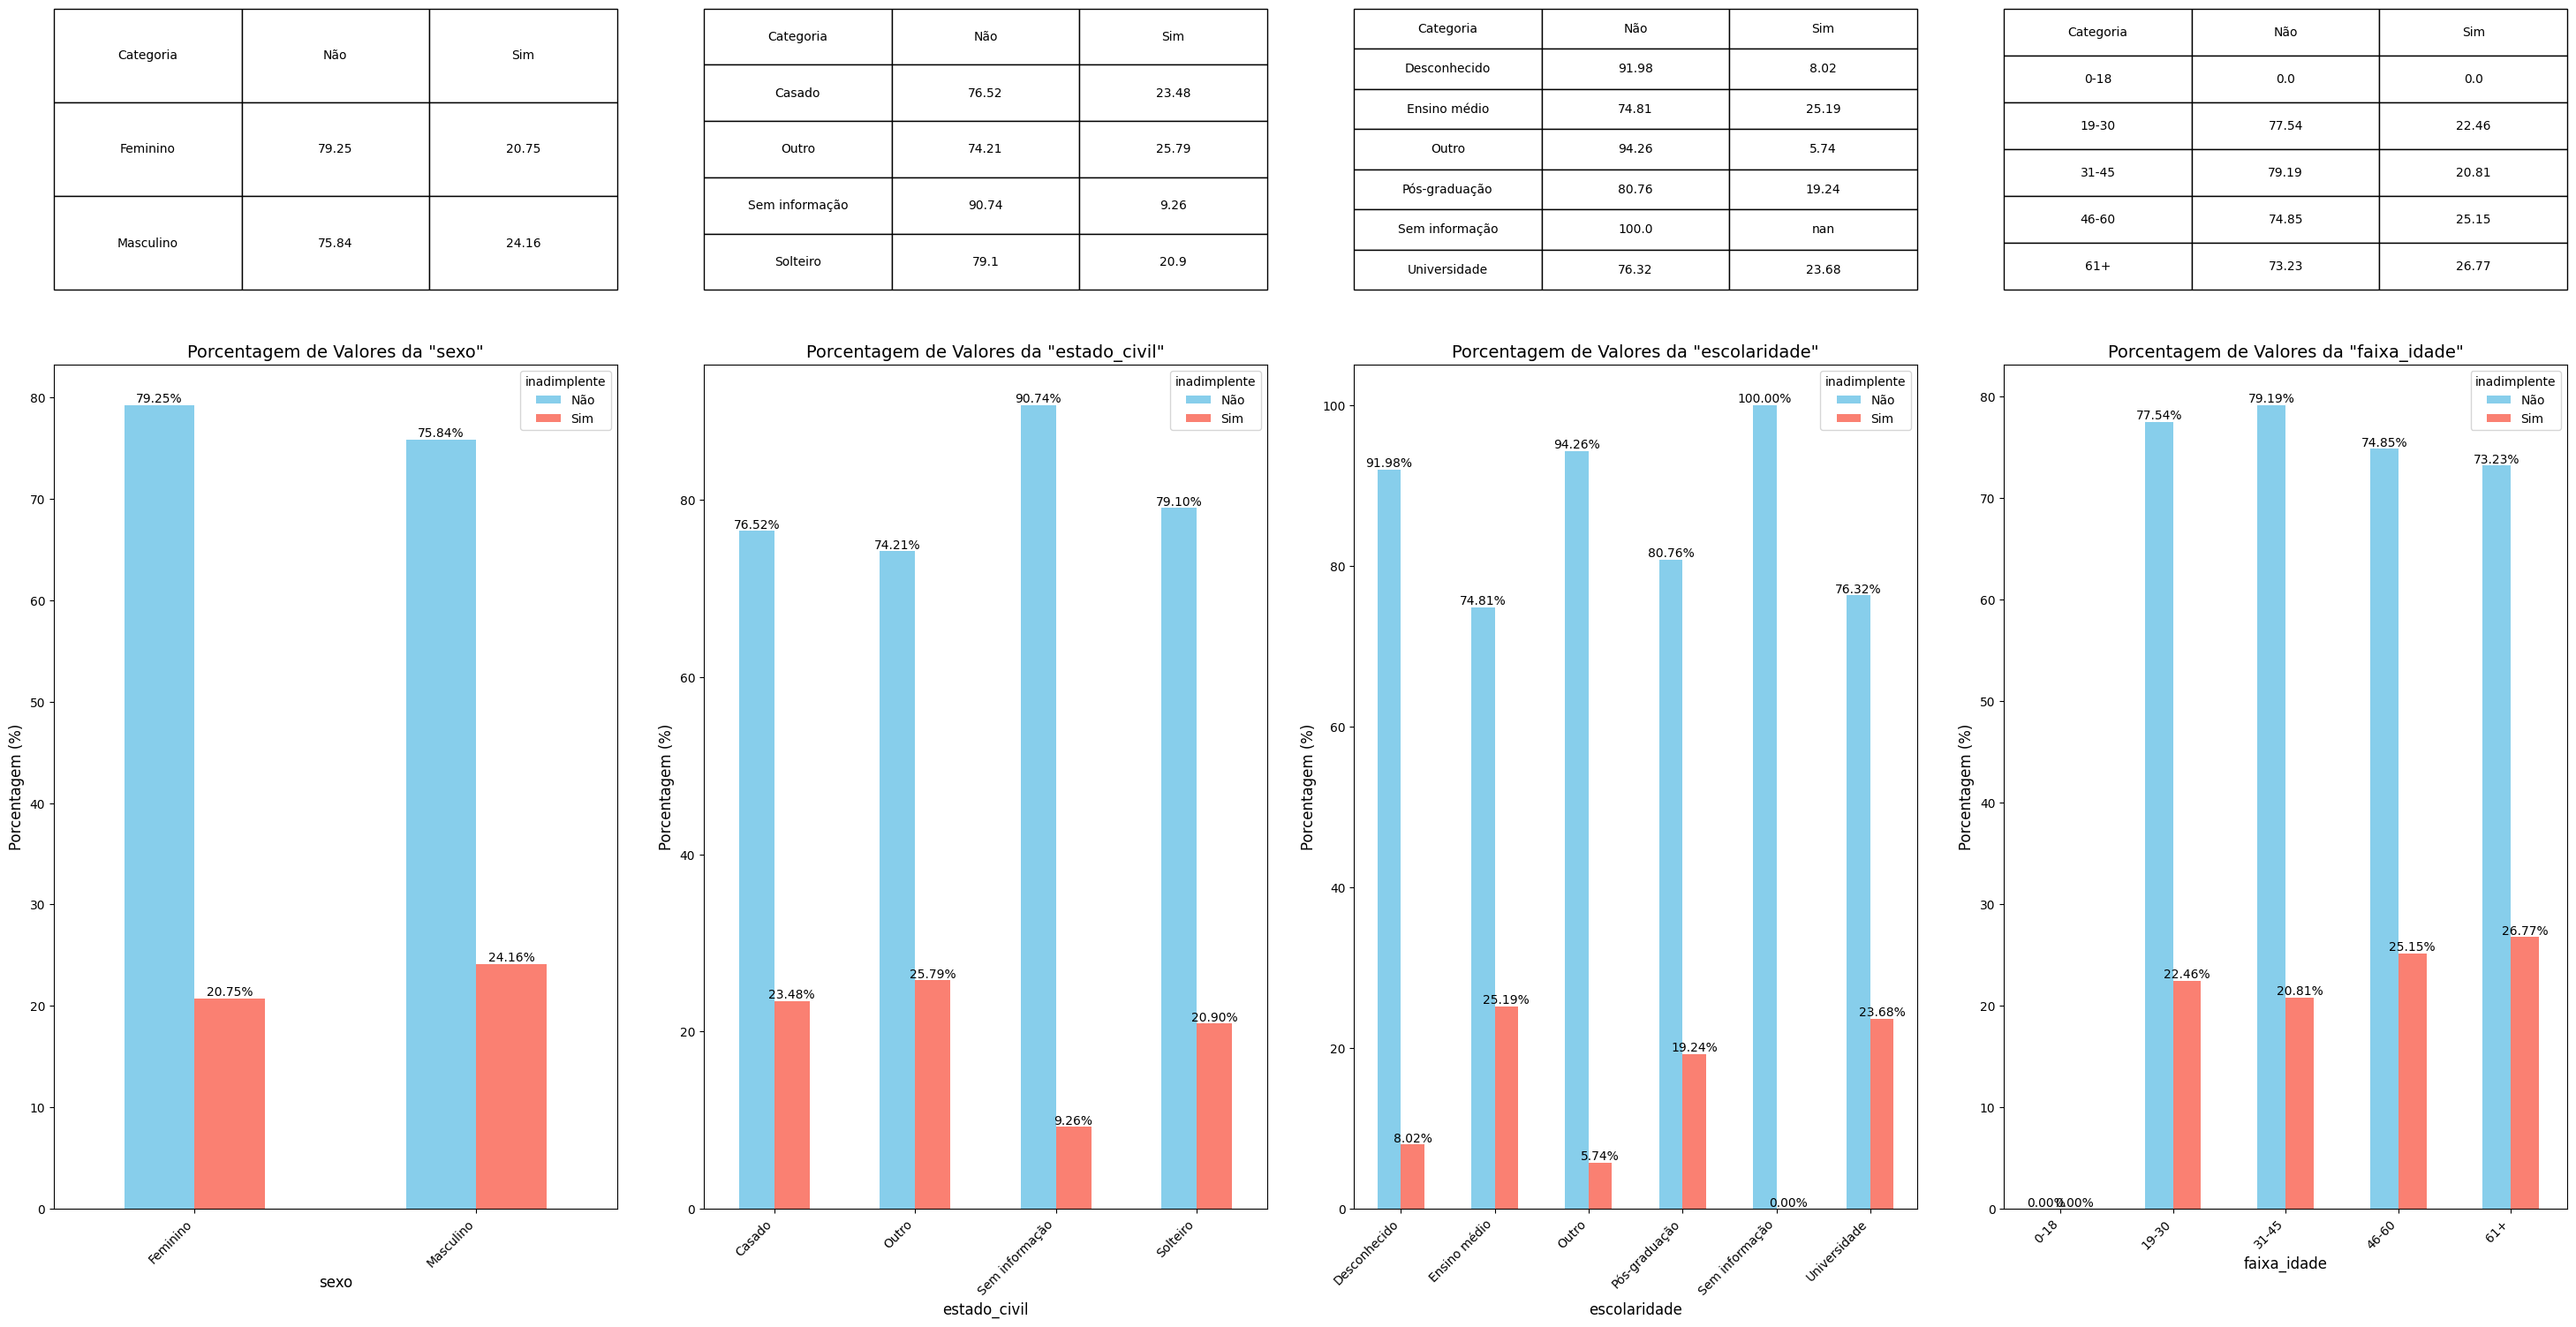

In [38]:
# Definir o número de colunas e linhas para subplots
num_colunas = len(colunas_para_analise)
num_linhas = 2  # 1 linha para a tabela e 1 para o gráfico

# Criar a figura e os eixos
fig, axes = plt.subplots(nrows=num_linhas, ncols=num_colunas, figsize=(30, 15), gridspec_kw={'height_ratios': [1, 3]})

# Ajustar o layout
plt.tight_layout(pad=4.0)

# Loop para gerar gráficos e tabelas para cada coluna
for i, coluna in enumerate(colunas_para_analise):
    # Adicionar os eixos para tabela e gráfico
    tabela_ax = axes[0, i] if num_colunas > 1 else axes[0]
    grafico_ax = axes[1, i] if num_colunas > 1 else axes[1]

    # Calcular a porcentagem
    porcentagem_por_coluna = (credit_df.groupby(coluna)['inadimplente']
                              .value_counts(normalize=True) * 100).unstack().round(2)
    
    
    # Adicionar a tabela
    tabela = tabela_ax.table(cellText=porcentagem_por_coluna.reset_index().values,
                             colLabels=['Categoria'] + porcentagem_por_coluna.columns.tolist(),
                             cellLoc='center', loc='center', bbox=[0, 0, 1, 1])
    tabela_ax.axis('off')  # Desativar o eixo para a tabela

    # Adicionar o gráfico
    barras = porcentagem_por_coluna.plot(kind='bar', ax=grafico_ax, color=['skyblue', 'salmon', 'lightgreen'])

    # Adicionar título e rótulos
    grafico_ax.set_title(f'Porcentagem de Valores da "{coluna}"', fontsize=14)
    grafico_ax.set_xlabel(coluna, fontsize=12)
    grafico_ax.set_ylabel('Porcentagem (%)', fontsize=12)
    grafico_ax.set_xticks(range(len(porcentagem_por_coluna.index)))
    grafico_ax.set_xticklabels(porcentagem_por_coluna.index, rotation=45, ha='right')

    # Adicionar rótulos de dados com duas casas decimais
    for bar in barras.patches:
        height = bar.get_height()
        grafico_ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}%', 
                        ha='center', va='bottom', fontsize=10)

# Exibir o gráfico
plt.show()

In [39]:
credit_df[['sexo', 'escolaridade', 'inadimplente']].value_counts(normalize=True)*100

sexo       escolaridade    inadimplente
Feminino   Universidade    Não             22.438942
           Pós-graduação   Não             16.998484
Masculino  Universidade    Não             13.255853
           Pós-graduação   Não             11.497389
Feminino   Ensino médio    Não              7.454944
           Universidade    Sim              6.390433
Masculino  Ensino médio    Não              4.810510
           Universidade    Sim              4.685868
Feminino   Pós-graduação   Sim              3.762843
Masculino  Pós-graduação   Sim              3.025097
Feminino   Ensino médio    Sim              2.304194
Masculino  Ensino médio    Sim              1.825838
Feminino   Desconhecido    Não              0.640054
Masculino  Desconhecido    Não              0.363820
Feminino   Outro           Não              0.259390
Masculino  Outro           Não              0.128011
Feminino   Desconhecido    Sim              0.053899
Masculino  Desconhecido    Sim              0.033687
      

In [40]:
credit_df['sexo'].value_counts(normalize=True)*100

sexo
Feminino     60.333502
Masculino    39.666498
Name: proportion, dtype: float64

In [41]:
credit_df['escolaridade'].value_counts(normalize=True)*100

escolaridade
Universidade      46.771097
Pós-graduação     35.283813
Ensino médio      16.395486
Desconhecido       1.091460
Outro              0.410982
Sem informação     0.047162
Name: proportion, dtype: float64

In [42]:
credit_df['estado_civil'].value_counts(normalize=True)*100

estado_civil
Solteiro          53.259222
Casado            45.487620
Outro              1.071248
Sem informação     0.181910
Name: proportion, dtype: float64

In [43]:
credit_df['inadimplente'].value_counts(normalize=True)*100

inadimplente
Não    77.89456
Sim    22.10544
Name: proportion, dtype: float64

In [44]:
credit_df[['sexo', 'inadimplente']].value_counts(normalize=True)*100

sexo       inadimplente
Feminino   Não             47.812026
Masculino  Não             30.082533
Feminino   Sim             12.521475
Masculino  Sim              9.583965
Name: proportion, dtype: float64

In [45]:
credit_df[['escolaridade', 'inadimplente']].value_counts(normalize=True)*100

escolaridade    inadimplente
Universidade    Não             35.694795
Pós-graduação   Não             28.495873
Ensino médio    Não             12.265454
Universidade    Sim             11.076301
Pós-graduação   Sim              6.787940
Ensino médio    Sim              4.130032
Desconhecido    Não              1.003874
Outro           Não              0.387401
Desconhecido    Sim              0.087586
Sem informação  Não              0.047162
Outro           Sim              0.023581
Name: proportion, dtype: float64

In [46]:
credit_df[['estado_civil', 'inadimplente']].value_counts(normalize=True)*100

estado_civil    inadimplente
Solteiro        Não             42.125653
Casado          Não             34.808826
Solteiro        Sim             11.133569
Casado          Sim             10.678794
Outro           Não              0.795014
                Sim              0.276234
Sem informação  Não              0.165067
                Sim              0.016844
Name: proportion, dtype: float64

In [47]:
credit_df[['sexo', 'escolaridade', 'inadimplente']].value_counts(normalize=True)*100

sexo       escolaridade    inadimplente
Feminino   Universidade    Não             22.438942
           Pós-graduação   Não             16.998484
Masculino  Universidade    Não             13.255853
           Pós-graduação   Não             11.497389
Feminino   Ensino médio    Não              7.454944
           Universidade    Sim              6.390433
Masculino  Ensino médio    Não              4.810510
           Universidade    Sim              4.685868
Feminino   Pós-graduação   Sim              3.762843
Masculino  Pós-graduação   Sim              3.025097
Feminino   Ensino médio    Sim              2.304194
Masculino  Ensino médio    Sim              1.825838
Feminino   Desconhecido    Não              0.640054
Masculino  Desconhecido    Não              0.363820
Feminino   Outro           Não              0.259390
Masculino  Outro           Não              0.128011
Feminino   Desconhecido    Sim              0.053899
Masculino  Desconhecido    Sim              0.033687
      

### Persona: público alvo para o produto crédito

Sexo: Feminino ou Masculino

Escolaridade: Graduate School ou o que for maior

Estado Civil: Solteiro

In [48]:
credit_df[['estado_civil', 'sexo', 'inadimplente']].value_counts(normalize=True)*100

estado_civil    sexo       inadimplente
Solteiro        Feminino   Não             25.174330
Casado          Feminino   Não             22.024592
Solteiro        Masculino  Não             16.951322
Casado          Masculino  Não             12.784234
                Feminino   Sim              6.181573
Solteiro        Feminino   Sim              6.181573
                Masculino  Sim              4.951996
Casado          Masculino  Sim              4.497221
Outro           Feminino   Não              0.488462
                Masculino  Não              0.306552
                Feminino   Sim              0.148223
                Masculino  Sim              0.128011
Sem informação  Feminino   Não              0.124642
                Masculino  Não              0.040424
                Feminino   Sim              0.010106
                Masculino  Sim              0.006737
Name: proportion, dtype: float64

In [49]:
ages_ = credit_df[credit_df['inadimplente'] == 'Sim'][['idade', 'inadimplente','escolaridade']].value_counts(normalize=True)*100
ages_

idade  inadimplente  escolaridade 
25     Sim           Universidade     2.880219
24     Sim           Universidade     2.758305
27     Sim           Universidade     2.453520
23     Sim           Universidade     2.285888
29     Sim           Universidade     2.240171
                                        ...   
69     Sim           Pós-graduação    0.015239
70     Sim           Pós-graduação    0.015239
72     Sim           Ensino médio     0.015239
73     Sim           Universidade     0.015239
75     Sim           Pós-graduação    0.015239
Name: proportion, Length: 176, dtype: float64

In [50]:
agg_df = credit_df[['sexo', 'escolaridade', 'inadimplente']].groupby(['inadimplente', 'sexo']).size()
agg_df

inadimplente  sexo     
Não           Feminino     14193
              Masculino     8930
Sim           Feminino      3717
              Masculino     2845
dtype: int64

In [51]:
credit_df.columns

Index(['id', 'qtd_credito', 'sexo', 'escolaridade', 'estado_civil', 'idade',
       'status_pagamento_setembro_2005', 'status_pagamento_agosto_2005',
       'status_pagamento_julho_2005', 'status_pagamento_junho_2005',
       'status_pagamento_maio_2005', 'status_pagamento_abril_2005',
       'fatura_setembro_2005', 'fatura_agosto_2005', 'fatura_julho_2005',
       'fatura_junho_2005', 'fatura_maio_2005', 'fatura_abril_2005',
       'pagamento_setembro_2005', 'pagamento_agosto_2005',
       'pagamento_julho_2005', 'pagamento_junho_2005', 'pagamento_maio_2005',
       'pagamento_abril_2005', 'inadimplente', 'faixa_idade', 'faixa_credito'],
      dtype='object')

In [52]:
df = pd.read_excel('../data/default_of_credit_card_clients.xls')

In [53]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

`(-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)`


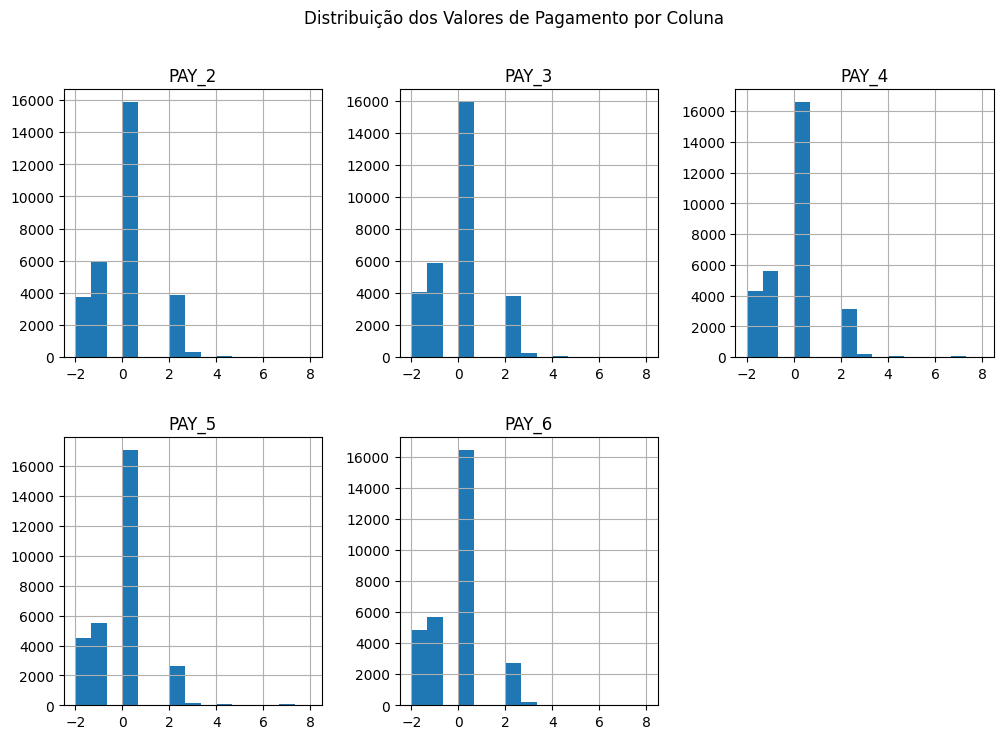

In [54]:
df[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4','PAY_5', 'PAY_6']].hist(bins=15, figsize=(12, 8), layout=(2, 3))
plt.suptitle('Distribuição dos Valores de Pagamento por Coluna')
plt.show()

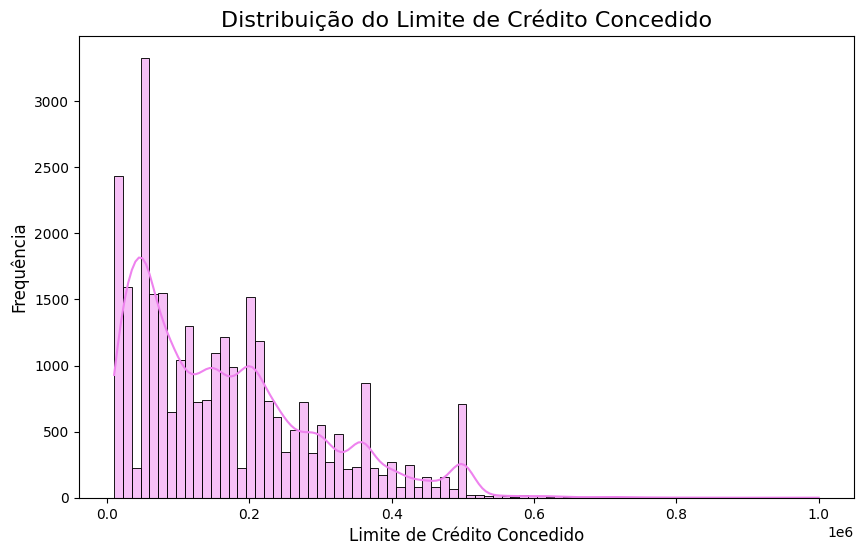

In [55]:
plt.figure(figsize=(10, 6))
sns.histplot(credit_df['qtd_credito'], bins=80, kde=True, color='violet', edgecolor='black')


plt.title('Distribuição do Limite de Crédito Concedido', fontsize=16)
plt.xlabel('Limite de Crédito Concedido', fontsize=12)
plt.ylabel('Frequência', fontsize=12)

plt.show()

<Axes: xlabel='idade', ylabel='Count'>

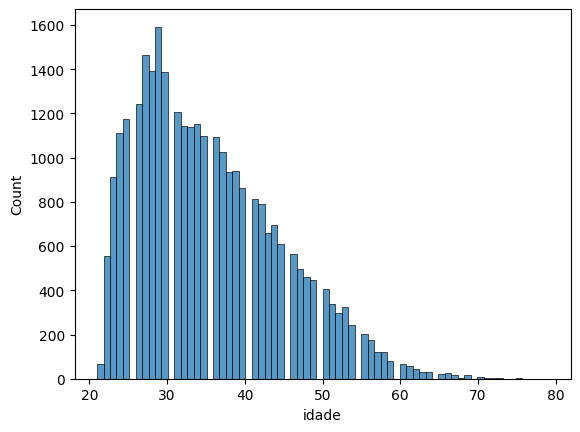

In [56]:
sns.histplot(x=credit_df['idade'])

In [57]:
defaulters = credit_df['inadimplente'].value_counts(normalize=True)*100
defaulters

inadimplente
Não    77.89456
Sim    22.10544
Name: proportion, dtype: float64

In [58]:
credit_df[['qtd_credito', 'inadimplente']].groupby(['qtd_credito','inadimplente']).size()

qtd_credito  inadimplente
10000        Não              292
             Sim              193
16000        Não                2
20000        Não             1258
             Sim              692
                             ... 
750000       Não                4
760000       Não                1
780000       Não                2
800000       Não                2
1000000      Não                1
Length: 145, dtype: int64

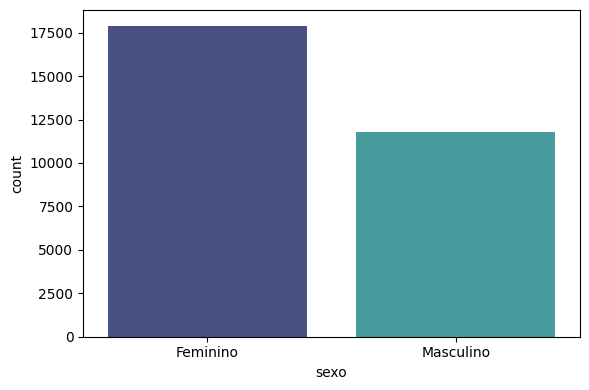

In [59]:
plt.figure(figsize=(6,4))

sns.countplot(data=credit_df, x='sexo', palette='mako', hue='sexo')

plt.tight_layout()
plt.show()

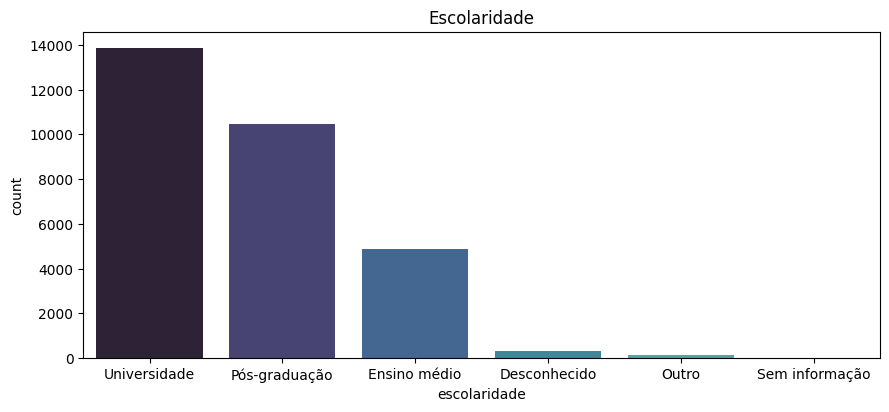

In [60]:
plt.figure(figsize=(9,4))

sns.countplot(data=credit_df, x='escolaridade', palette='mako', hue='escolaridade')

plt.tight_layout()
plt.title('Escolaridade')
plt.show()